# 모델 돌리면 기존에 학습한거랑 다르게 학습된 모델이 나오니까 이전 모델보다 정확도 높으면 submission, 모델 저장하기
- 낮으면 굳이 저장할 필요 없음


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled_cleansed.csv'
df = pd.read_csv(filename, index_col='ymdhm', parse_dates=['ymdhm'])
df.head()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0


In [ ]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.0,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.036770,345.631700,329.232797,746.826551,316.071760,0.0,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317791,174.250734,76.559900,1077.388189,67.495669,0.0,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,-222.000000,39.000000,259.700000,243.290000,246.200000,0.0,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,0.0,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,0.0,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,0.0,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276336 entries, 2012-05-01 00:00:00 to 2022-07-18 23:50:00
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   swl          276336 non-null  float64
 1   inf          276336 non-null  float64
 2   sfw          276336 non-null  float64
 3   ecpc         276336 non-null  float64
 4   tototf       276336 non-null  float64
 5   tide_level   276336 non-null  float64
 6   wl_1018662   276336 non-null  float64
 7   fw_1018662   276336 non-null  float64
 8   wl_1018680   276336 non-null  float64
 9   fw_1018680   276336 non-null  float64
 10  wl_1018683   276336 non-null  float64
 11  fw_1018683   276336 non-null  float64
 12  wl_1019630   276336 non-null  float64
 13  fw_1019630   276336 non-null  float64
 14  rf_10184100  276336 non-null  float64
 15  rf_10184110  276336 non-null  float64
 16  rf_10184140  276336 non-null  float64
dtypes: float64(17)
memory usage: 37.9

In [ ]:
df.isnull().sum()

swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     0
wl_1018662     0
fw_1018662     0
wl_1018680     0
fw_1018680     0
wl_1018683     0
fw_1018683     0
wl_1019630     0
fw_1019630     0
rf_10184100    0
rf_10184110    0
rf_10184140    0
dtype: int64

In [ ]:
sub_df = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [ ]:
df.sort_index(inplace=True)
sub_df.sort_index(inplace=True)

In [ ]:
target = df.loc[:,sub_df.columns]
data = df.drop(sub_df.columns,axis=1)

In [ ]:
target.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3


In [ ]:
data.head()

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0


In [ ]:
# data와 target 하나 밀어주기 (과거데이터를 사용해야 함으로)
y = target.reset_index(drop=True)
X = data.reset_index(drop=True)

X.index += 1

tot=pd.concat((X,y),axis=1)
tot=tot.sort_index()

tot=tot.iloc[1:-1]

target = tot.loc[:,sub_df.columns]
data = tot.drop(sub_df.columns,axis=1)

In [ ]:
train_target=target.iloc[:-len(sub_df),:]
test_target=target.iloc[-len(sub_df):,:]

train_data=data.iloc[:-len(sub_df),:]
test_data=data.iloc[-len(sub_df):,:]

In [ ]:
train_target

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
1,314.7,300.2,290.0,275.3
2,313.7,301.2,290.0,275.3
3,311.7,301.2,290.0,276.3
4,311.7,301.2,291.0,277.3
5,311.7,301.2,291.0,277.3
...,...,...,...,...
269419,281.7,281.2,278.0,271.3
269420,279.7,279.2,278.0,272.3
269421,278.7,277.2,277.0,272.3
269422,277.7,276.2,276.0,271.3


In [ ]:
train_data

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
1,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
3,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
4,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
5,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269419,25.180,140.89,217.99,26.01,140.89,232.0,314.01,0.0,597.98,471.08,0.0,0.0,0.0
269420,25.180,140.94,217.99,26.01,140.94,220.0,285.72,0.0,575.57,493.58,0.0,0.0,0.0
269421,25.180,141.07,217.99,26.01,141.07,208.0,274.78,0.0,501.04,505.03,0.0,0.0,0.0
269422,25.180,141.01,217.99,26.01,141.01,196.0,269.40,0.0,425.89,505.03,0.0,0.0,0.0


# feature scaling

## standardization

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_std = scaler.fit_transform(train_data) # 학습데이터 feature scaling
x_test_std = scaler.transform(test_data)

In [ ]:
x_train_std

array([[-1.92855805,  0.0106116 , -0.0572073 , ..., -0.09883235,
        -0.10173185, -0.09795489],
       [-1.96966827, -0.07114668, -0.07837522, ..., -0.09883235,
        -0.10173185, -0.09795489],
       [-2.00392679, -0.0589372 , -0.09551115, ..., -0.09883235,
        -0.10173185, -0.09795489],
       ...,
       [ 0.67508905, -0.36374909, -0.16607089, ..., -0.09883235,
        -0.10173185, -0.09795489],
       [ 0.67508905, -0.36380335, -0.16607089, ..., -0.09883235,
        -0.10173185, -0.09795489],
       [ 0.74360608,  0.19217106, -0.12877503, ..., -0.09883235,
        -0.10173185, -0.09795489]])

In [ ]:
x_train_std.shape

(269423, 13)

In [ ]:
train_data.shape

(269423, 13)

# train-test 데이터 나누기

* train y

In [ ]:
y1 = train_target.iloc[:,0] #청담대교
y2 = train_target.iloc[:,1] #잠수교
y3 = train_target.iloc[:,2] #한강대교 
y4 = train_target.iloc[:,3] #행주대교

In [ ]:
train_target.shape

(269423, 4)

In [ ]:
y1

1         314.7
2         313.7
3         311.7
4         311.7
5         311.7
          ...  
269419    281.7
269420    279.7
269421    278.7
269422    277.7
269423    278.7
Name: wl_1018662, Length: 269423, dtype: float64

* test y

In [ ]:
y1_test = test_target.iloc[:,0] #청담대교
y2_test = test_target.iloc[:,1] #잠수교
y3_test = test_target.iloc[:,2] #한강대교 
y4_test = test_target.iloc[:,3] #행주대교

In [ ]:
test_target.shape

(6912, 4)

In [ ]:
y1_test

269424    279.0
269425    281.0
269426    284.0
269427    285.0
269428    284.0
          ...  
276331    288.0
276332    287.0
276333    299.0
276334    309.0
276335    326.0
Name: wl_1018662, Length: 6912, dtype: float64

# 모델

In [ ]:
import xgboost as xgb

## 파라미터 조정 -> regressor는 없고 classifier만 있음 = 실패

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear','reg:squarederror']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator='reg:squarederror',
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(train_data,y1)

TypeError: ignored

## 임의로 지정

In [ ]:
# xgb_model = xgb.XGBRegressor(max_depth=2, n_estimators=1000)

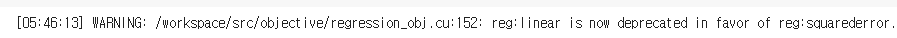

[05:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

* 위에 error로 인해서 reg:squarederror 로 바꿈

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth = 2, n_estimators = 1000)

## 종속1

* train 데이터

In [ ]:
y1

1         314.7
2         313.7
3         311.7
4         311.7
5         311.7
          ...  
269419    281.7
269420    279.7
269421    278.7
269422    277.7
269423    278.7
Name: wl_1018662, Length: 269423, dtype: float64

In [ ]:
y1 = np.array(y1)
y1

array([314.7, 313.7, 311.7, ..., 278.7, 277.7, 278.7])

In [ ]:
xgb_model1=xgb_model.fit(x_train_std, y1)

In [ ]:
xgb_model1

XGBRegressor(max_depth=2, n_estimators=1000, objective='reg:squarederror')

* y_preds

In [ ]:
y1_preds = xgb_model1.predict(x_test_std)
y1_preds

array([279.15753, 279.56558, 281.23822, ..., 292.8317 , 307.2099 ,
       318.47733], dtype=float32)

* test데이터

In [ ]:
y1_test = np.array(y1_test)
y1_test

array([279., 281., 284., ..., 299., 309., 326.])

* score 보기

In [ ]:
print('train data 정확도:', xgb_model1.score(x_train_std, y1))
print('test data 정확도:', xgb_model1.score(x_test_std, y1_test))

train data 정확도: 0.9991833280029114
test data 정확도: 0.998925618918971


## 종속2

In [ ]:
y2

1         300.2
2         301.2
3         301.2
4         301.2
5         301.2
          ...  
269419    281.2
269420    279.2
269421    277.2
269422    276.2
269423    276.2
Name: wl_1018680, Length: 269423, dtype: float64

In [ ]:
y2 = np.array(y2)
y2

array([300.2, 301.2, 301.2, ..., 277.2, 276.2, 276.2])

In [ ]:
xgb_model2=xgb_model.fit(x_train_std, y2)

In [ ]:
xgb_model2

XGBRegressor(max_depth=2, n_estimators=1000, objective='reg:squarederror')

* y_preds

In [ ]:
y2_preds = xgb_model2.predict(x_test_std)
y2_preds

array([272.01114, 273.2155 , 273.39328, ..., 296.9285 , 305.18015,
       313.00516], dtype=float32)

* test데이터

In [ ]:
y2_test = np.array(y2_test)
y2_test

array([276., 277., 277., ..., 307., 311., 314.])

* score 보기

In [ ]:
print('train data 정확도:', xgb_model2.score(x_train_std, y2))
print('test data 정확도:', xgb_model2.score(x_test_std, y2_test))

train data 정확도: 0.9912739369207187
test data 정확도: 0.9952434280993556


## 종속3

In [ ]:
y3

1         290.0
2         290.0
3         290.0
4         291.0
5         291.0
          ...  
269419    278.0
269420    278.0
269421    277.0
269422    276.0
269423    275.0
Name: wl_1018683, Length: 269423, dtype: float64

In [ ]:
y3 = np.array(y3)
y3

array([290., 290., 290., ..., 277., 276., 275.])

In [ ]:
xgb_model3=xgb_model.fit(x_train_std, y3)

In [ ]:
xgb_model3

XGBRegressor(max_depth=2, n_estimators=1000, objective='reg:squarederror')

* y_preds

In [ ]:
y3_preds = xgb_model3.predict(x_test_std)
y3_preds

array([269.82306, 271.71097, 273.10593, ..., 299.36725, 310.75974,
       314.5395 ], dtype=float32)

* test데이터

In [ ]:
y3_test = np.array(y3_test)
y3_test

array([274., 274., 274., ..., 309., 314., 317.])

* score 보기

In [ ]:
print('train data 정확도:', xgb_model3.score(x_train_std, y3))
print('test data 정확도:', xgb_model3.score(x_test_std, y3_test))

train data 정확도: 0.8809348795986786
test data 정확도: 0.8874560960981666


## 종속 4

In [ ]:
y4

1         275.3
2         275.3
3         276.3
4         277.3
5         277.3
          ...  
269419    271.3
269420    272.3
269421    272.3
269422    271.3
269423    270.3
Name: wl_1019630, Length: 269423, dtype: float64

In [ ]:
y4 = np.array(y4)
y4

array([275.3, 275.3, 276.3, ..., 272.3, 271.3, 270.3])

In [ ]:
xgb_model4=xgb_model.fit(x_train_std, y4)

In [ ]:
xgb_model4

XGBRegressor(max_depth=2, n_estimators=1000, objective='reg:squarederror')

* y_preds

In [ ]:
y4_preds = xgb_model4.predict(x_test_std)
y4_preds

array([270.22623, 267.76993, 265.86398, ..., 309.51437, 311.56815,
       311.9681 ], dtype=float32)

* test데이터

In [ ]:
y4_test = np.array(y4_test)
y4_test

array([269., 267., 264., ..., 310., 312., 313.])

* score 보기

In [ ]:
print('train data 정확도:', xgb_model4.score(x_train_std, y4))
print('test data 정확도:', xgb_model4.score(x_test_std, y4_test))

train data 정확도: 0.9982314303938536
test data 정확도: 0.9988140902992032


## 예측 결과(y_preds) 합치기

In [ ]:
df_y1_preds = pd.DataFrame(y1_preds)
df_y2_preds = pd.DataFrame(y2_preds)
df_y3_preds = pd.DataFrame(y3_preds)
df_y4_preds = pd.DataFrame(y4_preds)

In [ ]:
pred=pd.concat([df_y1_preds,df_y2_preds,df_y3_preds,df_y4_preds], axis = 1)
pred.columns=train_target.columns
pred

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,279.157532,272.011139,269.823059,270.226227
1,279.565582,273.215515,271.710968,267.769928
2,281.238220,273.393280,273.105927,265.863983
3,284.879517,276.735809,273.035950,262.704102
4,284.745453,274.013306,271.487061,259.490906
...,...,...,...,...
6907,288.386688,289.272308,293.895172,307.265289
6908,291.982849,295.877289,299.063721,309.921234
6909,292.831696,296.928497,299.367249,309.514374
6910,307.209900,305.180145,310.759735,311.568146


# 제출양식

In [ ]:
sub_df = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [ ]:
pred.index=sub_df.index
pred

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,279.157532,272.011139,269.823059,270.226227
2022-06-01 00:10,279.565582,273.215515,271.710968,267.769928
2022-06-01 00:20,281.238220,273.393280,273.105927,265.863983
2022-06-01 00:30,284.879517,276.735809,273.035950,262.704102
2022-06-01 00:40,284.745453,274.013306,271.487061,259.490906
...,...,...,...,...
2022-07-18 23:10,288.386688,289.272308,293.895172,307.265289
2022-07-18 23:20,291.982849,295.877289,299.063721,309.921234
2022-07-18 23:30,292.831696,296.928497,299.367249,309.514374


## 실제 vs 예측 시각화

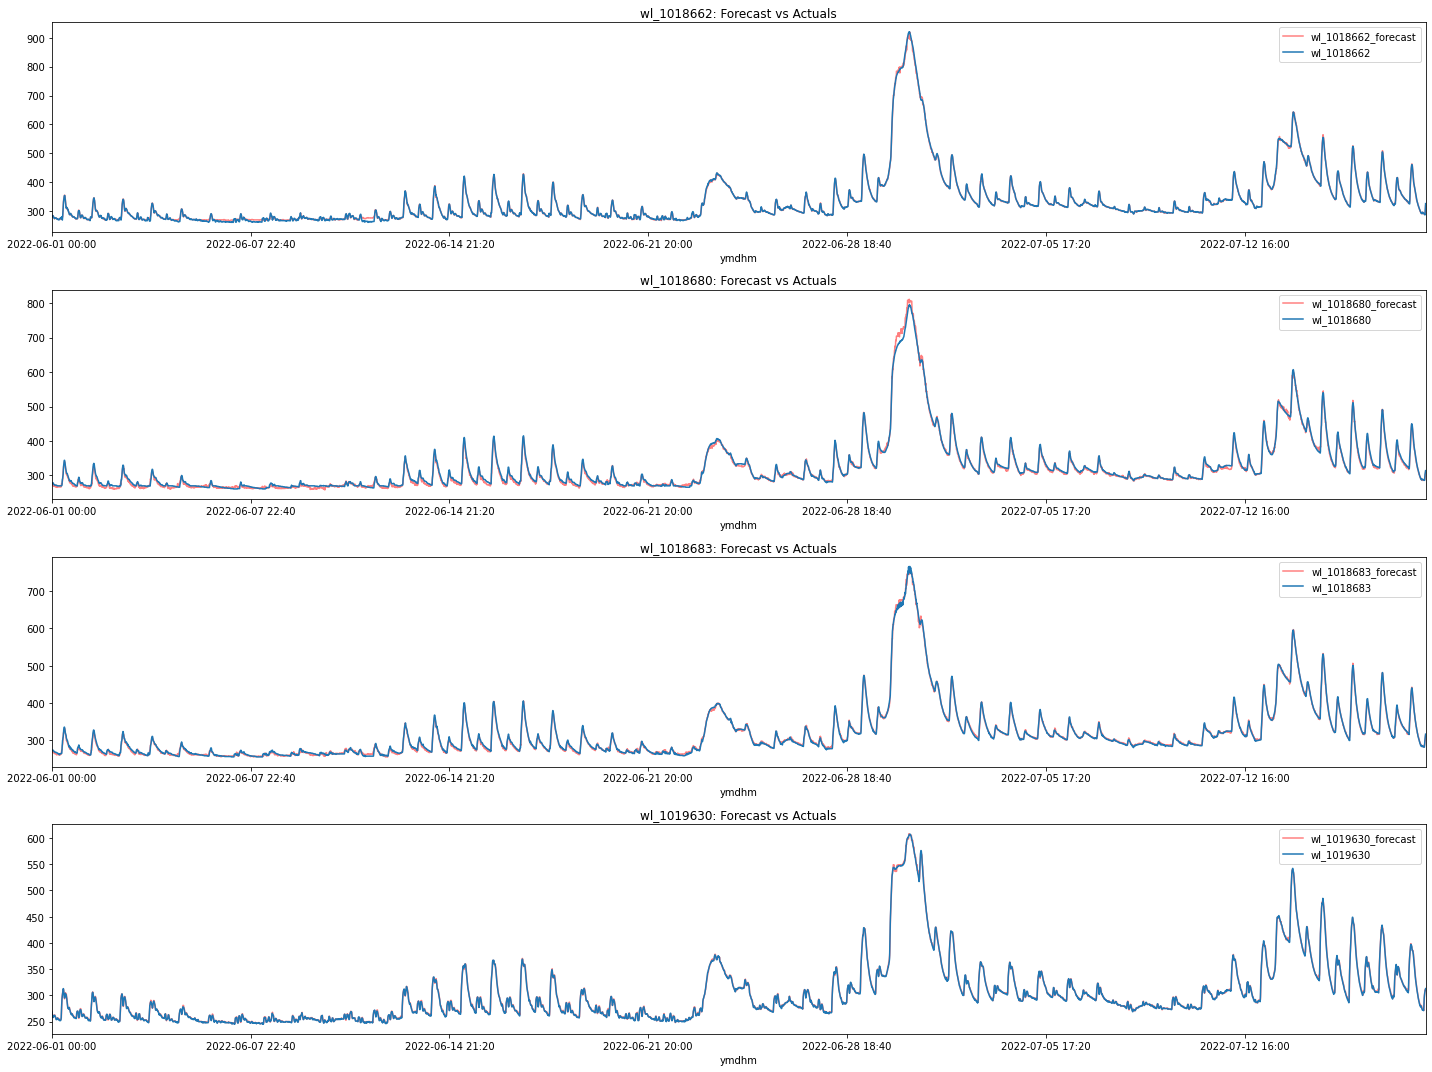

In [ ]:
import matplotlib.pyplot as plt

df_test_target=df.loc['2022-06-01 00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_test_target.index=pred.index
pred_y=pd.DataFrame.copy(pred)
pred_y.columns=['wl_1018662_forecast', 'wl_1018680_forecast', 'wl_1018683_forecast', 'wl_1019630_forecast']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,15))

for col, ax in zip(['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630'], axes):
    pred_y.plot(y=[col+'_forecast'], ax=ax, alpha=0.5, color='r', legend=True).autoscale(axis='x',tight=True)
    df_test_target[col].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
plt.tight_layout()
plt.show()

In [ ]:
pred.to_csv('/content/drive/Shareddrives/팔당댐/제출/XGBoost(2).csv')

# 모델 저장
- 모델 새롭게 돌려서 정확도 더 높은 새로운 예측값 얻었으면 모델 저장하기 (낮으면 저장할 필요 없음)

In [ ]:
# 파일명
# filename1 = 'xgb_model_wl_1018662_(2).model'
# filename2 = 'xgb_model_wl_1018680_(2).model'
# filename3 = 'xgb_model_wl_1018683_(2).model'
# filename4 = 'xgb_model_wl_1019630_(2).model'

# 모델 저장
# xgb_model1.save_model('/content/drive/Shareddrives/팔당댐/model/'+filename1)
# xgb_model2.save_model('/content/drive/Shareddrives/팔당댐/model/'+filename2)
# xgb_model3.save_model('/content/drive/Shareddrives/팔당댐/model/'+filename3)
# xgb_model4.save_model('/content/drive/Shareddrives/팔당댐/model/'+filename4)

In [ ]:
# (참고) 모델 불러오기
# new_xgb_model = xgb.XGBRegressor() # 모델 초기화
# new_xgb_model.load_model(filename1) # 모델 불러오기